# Function Approximation

In [2]:
import matplotlib.pyplot as plt
from feed_forward import *
from training import forward_model_training_0_1_2_3


Now that we have visualized our function, we proceed with the approximation using Neural Networks.

First, we start with f0 which is a relatively simple function to approximate. It's expression is reminded below.

In [4]:
from training import forward_model_training_0_1_2_3
loss_array_0 = forward_model_training_0_1_2_3(200, 0, 10**(-1), NN0_0())

#### Loss vs epochs

In [1]:
import matplotlib.pyplot as plt
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_array_0)), loss_array_0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f0_1')
plt.show()


NameError: name 'loss_array_0' is not defined

<Figure size 648x432 with 0 Axes>

#### Approximation vs true function 

In [2]:
with torch.no_grad():
    f0_approx =[]
    for i in Input_data_0:

        f0_approx.append(model_0_f0.forward(i).item())


NameError: name 'torch' is not defined

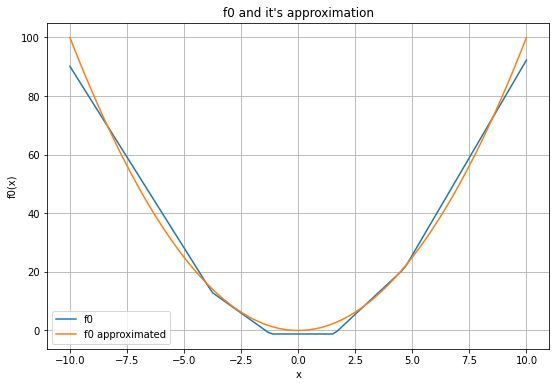

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(Input_data_0, f0_approx, label='f0')
plt.plot(Input_data_0, f0_data.reshape(len(Input_data_0), -1), label='f0 approximated')
plt.xlabel('x')
plt.ylabel('f0(x)')
plt.title('f0 and it\'s approximation')
plt.legend()
plt.grid()
plt.savefig('./figures/f0_approximation_1')
plt.show()


## ----------------------------------------------------------------

## F1 approximation

In this section our goal is to compare Deep and Shallow architectures for several type of NNs.

In [ ]:
%%latex
\(f_1(x):=xx-yy\), where \((x,y)\in \Re^2\)

<IPython.core.display.Latex object>

### Feedforward Neural Network

#### the Data

##### Importing the data

In [ ]:
Data_f1=pd.read_csv('./datasets/f1_dataset.csv')
Data_f1.head()

,Unnamed: 0,x,y,"f1(x,y)"
0,0,60.296030,55.715572,531.386272
1,1,-7.510751,39.793979,-1527.149415
2,2,-95.639564,-37.973797,7704.916906
3,3,-77.677768,18.811881,5679.948733
4,4,-21.572157,50.615062,-2096.526484


##### Loading the data

Splitting the data

In [ ]:
Input_data_1=Data_f1[['x', 'y']].to_numpy()
f1_data=Data_f1['f1(x,y)'].to_numpy()

In [ ]:
Input_train_1, Input_test_1,f1_train ,f1_test = train_test_split(Input_data_1, f1_data , test_size=0.33, random_state=42)

Transforming data to Tensors

In [ ]:
Input_data_1=torch.FloatTensor(Input_data_1).reshape(-1,2)
f1_data=torch.FloatTensor(f1_data).reshape(-1,1)

Input_train_1=torch.FloatTensor(Input_train_1).reshape(-1,2)
f1_train=torch.FloatTensor(f1_train).reshape(-1,1)

Input_test_1=torch.FloatTensor(Input_test_1).reshape(-1,2)
f1_test=torch.FloatTensor(f1_test).reshape(-1,1)

####
---------------------------------------------------------

#### ----------------------------------------------------------------

#### Deep model using ReLu

We have 4 architectures. With respectively, 4, 5, 7 and 10 hidden layer. 

We define a commun learning rate (lr). And commun epochs.

In [ ]:
lr=10**(-2)
epochs = 200

##### Architecture 1

In this architecture, we have 4 hidden layer. Each having 10 neurons. And, we use the ReLu activation function for all the layer.

In [ ]:
class NN1_F_D_1_ReLu(nn.Module):
    def __init__(self, input_features=2):
        super().__init__()
        self.layer1=nn.Linear(input_features, 10)
        self.layer2=nn.Linear(10, 10)
        self.layer3=nn.Linear(10, 10)
        self.layer4=nn.Linear(10, 10)
        self.layer5=nn.Linear(10, 10)
        
        self.output=nn.Linear(10,1)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x=self.output(x)
        return x

##### Creating the model 1

In [ ]:

model_f1_F_D_1_ReLu=NN1_F_D_1_ReLu()

##### Criterion and the optimizer 1

In [ ]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_f1_F_D_1_ReLu.parameters(), lr=lr)

##### Training the model 1

In [ ]:
loss_f1_F_D_1_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1_F_D_1_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_D_1_ReLu+=[loss.item()]

100%|██████████| 200/200 [00:00<00:00, 308.69it/s]


##### Visualizing the results of model 1

Loss vs epochs

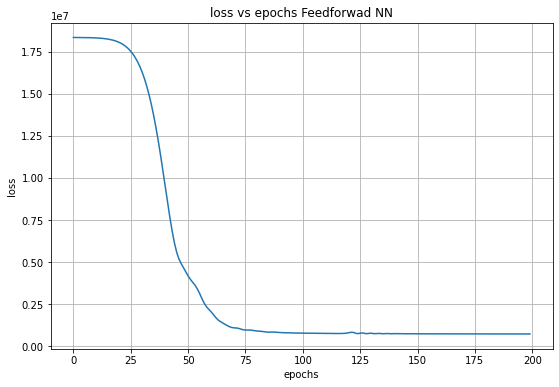

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_1_ReLu)), loss_f1_F_D_1_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_1_D')
plt.show()


In [ ]:
loss_f1_F_D_1_ReLu[0]/loss_f1_F_D_1_ReLu[-1]

25.18489113026008

The loss has decreased by a facto of 68

 Approximation vs true function 

Visualising the training

In [ ]:
###

Visualizing the test

In [ ]:
###

In [ ]:
###

Accuracy 

In [ ]:
###

##### Architecture 2

In this architecture, we have 5 hidden layers. Each has 10 neurons.

In [ ]:
class NN1_F_D_2_ReLu(nn.Module):
    def __init__(self, input_features=2):
        super().__init__()
        self.layer1=nn.Linear(input_features, 10)

        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,10)
        self.layer4 = nn.Linear(10,10)
        self.layer5 = nn.Linear(10,10)
        self.layer6 = nn.Linear(10,10)
       
        

        self.output=nn.Linear(10,1)

    def forward(self, x):

        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))

        x=self.output(x)
        
        return x

##### Creating the model 2

In [ ]:
model_f1_F_D_2_ReLu=NN1_F_D_2_ReLu()

##### Criterion the model 2

In [ ]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_f1_F_D_2_ReLu.parameters(), lr=lr)

##### Training the model 2

In [ ]:

loss_f1_F_D_2_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1_F_D_2_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_D_2_ReLu+=[loss.item()]

100%|██████████| 200/200 [00:00<00:00, 269.33it/s]


##### Visualisation of the results of model 2

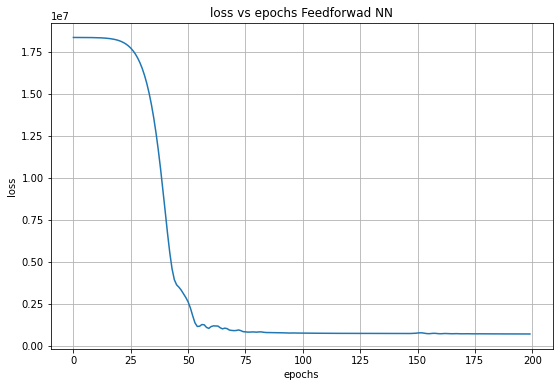

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_2_ReLu)), loss_f1_F_D_2_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_2_D')
plt.show()

##### Architecture 3

In this architecture, we have 7 hidden layers. Each has 10 neurons. 

In [ ]:
class NN1_F_D_3_ReLu(nn.Module):
    def __init__(self, input_features=2):
        super().__init__()
        self.layer1=nn.Linear(input_features, 10)

        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,10)
        self.layer4 = nn.Linear(10,10)
        self.layer5 = nn.Linear(10,10)
        self.layer6 = nn.Linear(10,10)
        self.layer7 = nn.Linear(10,10)
        self.layer8 = nn.Linear(10,10)
        

        self.output=nn.Linear(10,1)

    def forward(self, x):

        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))
        x = F.relu(self.layer7(x))
        x = F.relu(self.layer8(x))

        x=self.output(x)
        
        return x

##### Creating the model 3

In [ ]:
model_f1_F_D_3_ReLu=NN1_F_D_3_ReLu()

##### Criterion and the optimizer 3

In [ ]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_f1_F_D_3_ReLu.parameters(), lr=lr)

##### Training the model 3

In [ ]:

loss_f1_F_D_3_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1_F_D_3_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_D_3_ReLu+=[loss.item()]

100%|██████████| 200/200 [00:00<00:00, 212.94it/s]


##### Visualization of results of model 3 

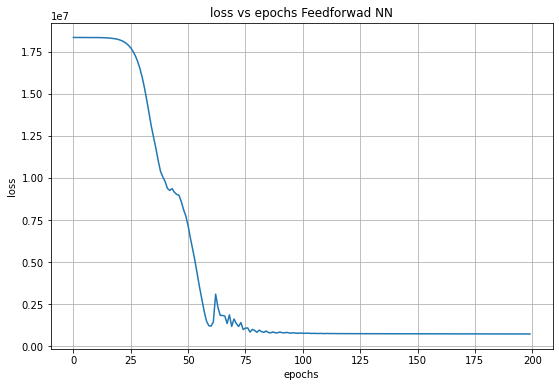

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_3_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_3_D')
plt.show()

##### Architecture 4

In this architecture, we have 10 hidden layers. Each has 10 neurons. 

In [ ]:
class NN1_F_D_4_ReLu(nn.Module):
    def __init__(self, input_features=2):
        super().__init__()
        self.layer1=nn.Linear(input_features, 10)

        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,10)
        self.layer4 = nn.Linear(10,10)
        self.layer5 = nn.Linear(10,10)
        self.layer6 = nn.Linear(10,10)
        self.layer7 = nn.Linear(10,10)
        self.layer8 = nn.Linear(10,10)
        self.layer9 = nn.Linear(10,10)
        self.layer10 = nn.Linear(10,10)
        self.layer11 = nn.Linear(10,10)


        self.output=nn.Linear(10,1)

    def forward(self, x):

        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.relu(self.layer5(x))
        x = F.relu(self.layer6(x))
        x = F.relu(self.layer7(x))
        x = F.relu(self.layer8(x))
        x = F.relu(self.layer9(x))
        x = F.relu(self.layer10(x))
        x = F.relu(self.layer11(x))

        x=self.output(x)
        
        return x

##### Creating the model 4

In [ ]:
torch.manual_seed(1234)
model_f1_F_D_4_ReLu=NN1_F_D_4_ReLu()

##### Criterion and optimizer 4

In [ ]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_f1_F_D_4_ReLu.parameters(), lr=lr)

##### Training the model 4

In [ ]:

loss_f1_F_D_4_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1_F_D_4_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_D_4_ReLu+=[loss.item()]

100%|██████████| 200/200 [00:01<00:00, 156.03it/s]


##### Visualizing the results of model 3

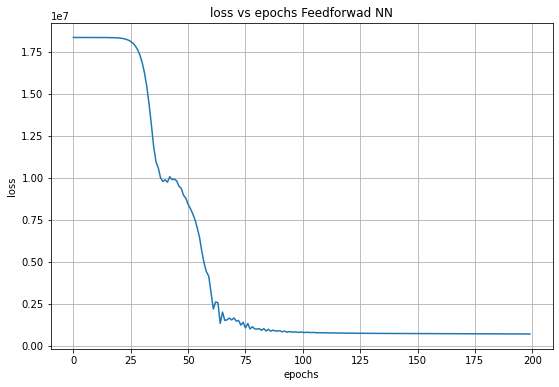

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_4_ReLu)), loss_f1_F_D_4_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_3_D')
plt.show()

####
########################################################################

#### Loss vs epochs for the 4 architectures

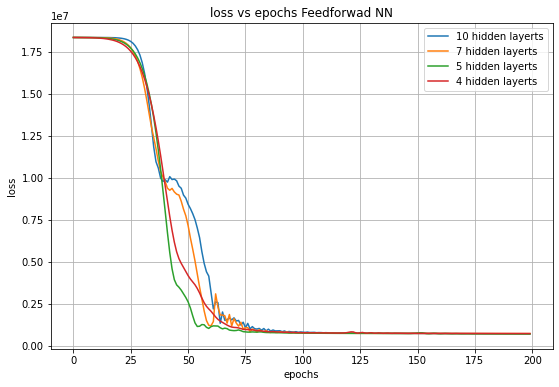

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_D_4_ReLu)), loss_f1_F_D_4_ReLu, label='10 hidden layerts')
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_3_ReLu, label='7 hidden layerts')
plt.plot(range(len(loss_f1_F_D_2_ReLu)), loss_f1_F_D_2_ReLu, label='5 hidden layerts')
plt.plot(range(len(loss_f1_F_D_1_ReLu)), loss_f1_F_D_1_ReLu, label='4 hidden layerts')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_D_several_hidden layers')
plt.show()

### ----------------------------------------------------------------

#### Shallow mode using ReLu

We have 4 architectures. With respectivelly 40, 50, 70 and 100 neurons despatched over 2 layer. 

We use a commun learning rate (lr) and commun epochs

In [ ]:
epochs = 200
lr=10**(-1)

##### The Architecture 1

We choose an architecture where we have 2 hidden layer. Each having 20 neurons. And, we use the ReLu activation function for all the layer.

In [ ]:
class NN1_F_S_1(nn.Module):
    def __init__(self, input_features=2, h1=20, h2=20):
        super().__init__()
        self.layer1=nn.Linear(input_features, h1)
        self.layer2=nn.Linear(h1, h2)
        self.output=nn.Linear(h2,1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x=self.output(x)
        return x

##### Creating the model 1

In [ ]:
torch.manual_seed(123)
model_f1__F_S_1_ReLu=NN1_F_S_1()

##### Criterion and the optimizer 1

In [ ]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_f1__F_S_1_ReLu.parameters(), lr=lr)

##### Training the model 1

In [ ]:
loss_f1_F_S_1_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1__F_S_1_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_S_1_ReLu+=[loss.item()]

100%|██████████| 200/200 [00:00<00:00, 501.22it/s]


##### Visualizing the results of model 2

loss vs epochs

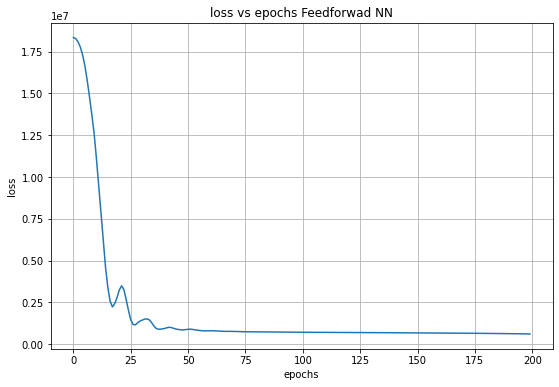

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_1_ReLu)), loss_f1_F_S_1_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_S_1')
plt.show()

##### Architecture 2

We choose an architecture where we have 2 hidden layer. Each having 25 neurons.

In [ ]:
class NN1_F_S_2(nn.Module):
    def __init__(self, input_features=2, h1=25, h2=25):
        super().__init__()
        self.layer1=nn.Linear(input_features, h1)
        self.layer2=nn.Linear(h1, h2)
        self.output=nn.Linear(h2,1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x=self.output(x)
        return x

##### Creating the model 2

In [ ]:
torch.manual_seed(123)
model_f1__F_S_2_ReLu=NN1_F_S_2()

##### Criterion and the optimizer 2

In [ ]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_f1__F_S_2_ReLu.parameters(), lr=lr)

##### Training the model 2

In [ ]:
loss_f1_F_S_2_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1__F_S_2_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_S_2_ReLu+=[loss.item()]

100%|██████████| 200/200 [00:00<00:00, 383.89it/s]


##### Visualizing the results of model 2

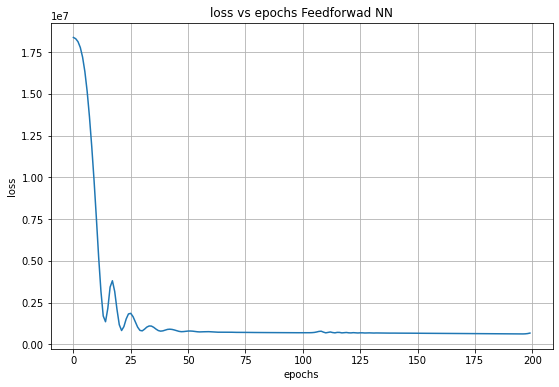

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_2_ReLu)), loss_f1_F_S_2_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_S_2')
plt.show()

##### The Architecture 3

We choose an architecture where we have 2 hidden layer. Each having 45 neurons. 

In [ ]:
class NN1_F_S_3(nn.Module):
    def __init__(self, input_features=2, h1=35, h2=35):
        super().__init__()
        self.layer1=nn.Linear(input_features, h1)
        self.layer2=nn.Linear(h1, h2)
        self.output=nn.Linear(h2,1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x=self.output(x)
        return x

##### Creating the model 3

In [ ]:
torch.manual_seed(123)
model_f1__F_S_3_ReLu=NN1_F_S_3()

##### Criterion and the optimizer 3

In [ ]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_f1__F_S_3_ReLu.parameters(), lr=lr)

##### Training the model 3

In [ ]:
loss_f1_F_S_3_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1__F_S_3_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_S_3_ReLu+=[loss.item()]

100%|██████████| 200/200 [00:00<00:00, 274.64it/s]


##### Visualizing the results of the 3rd model 

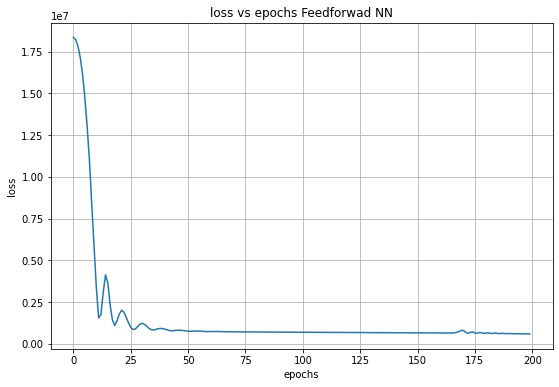

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_3_ReLu)), loss_f1_F_S_3_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_S_3')
plt.show()

##### Architecture 4

We choose an architecture where we have 2 hidden layer. Each having 50 neurons.

In [ ]:
class NN1_F_S_4(nn.Module):
    def __init__(self, input_features=2, h1=50, h2=50):
        super().__init__()
        self.layer1=nn.Linear(input_features, h1)
        self.layer2=nn.Linear(h1, h2)
        self.output=nn.Linear(h2,1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x=self.output(x)
        return x

##### Creating the model 4

In [ ]:
torch.manual_seed(123)
model_f1__F_S_4_ReLu=NN1_F_S_4()

##### Criterion and the optimizer 4

In [ ]:
criterion= nn.MSELoss()
optimizer=torch.optim.Adam(model_f1__F_S_4_ReLu.parameters(), lr=lr)

##### Training the 4th model 

In [ ]:
loss_f1_F_S_4_ReLu=[]

for e in tqdm(range(epochs)):
    
    # forward pass
    output = model_f1__F_S_4_ReLu(Input_train_1)

    # compute the loss
    loss = criterion(output, f1_train)


    optimizer.zero_grad() # clear previous gradients
    loss.backward() # backward pass
    optimizer.step()

    loss_f1_F_S_4_ReLu+=[loss.item()]

100%|██████████| 200/200 [00:01<00:00, 179.02it/s]


##### Visualization of the results of model 4

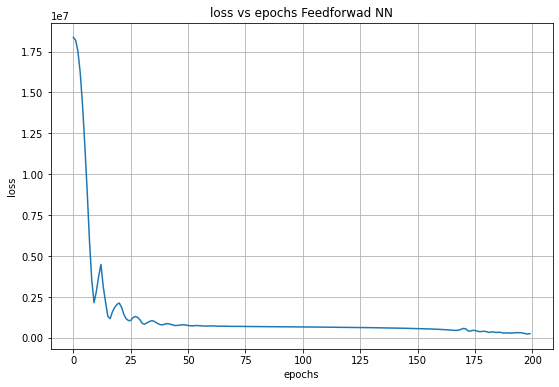

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_4_ReLu)), loss_f1_F_S_4_ReLu)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_F_S_4')
plt.show()

#### 
################################################################

#### Loss vs epochs for the 4 shallow architectures

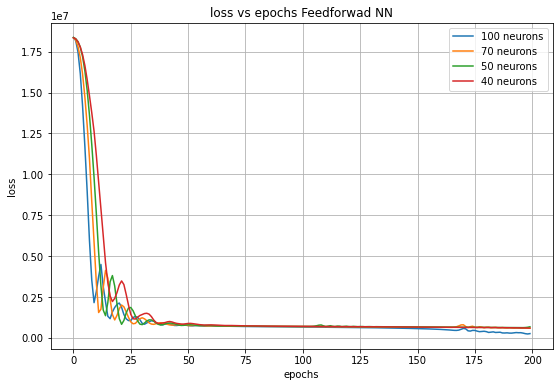

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_4_ReLu)), loss_f1_F_S_4_ReLu, label='100 neurons')
plt.plot(range(len(loss_f1_F_S_3_ReLu)), loss_f1_F_S_3_ReLu, label='70 neurons')
plt.plot(range(len(loss_f1_F_S_2_ReLu)), loss_f1_F_S_2_ReLu, label='50 neurons')
plt.plot(range(len(loss_f1_F_S_1_ReLu)), loss_f1_F_S_1_ReLu, label='40 neurons')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_S_several_shallow_NNs')
plt.show()

#### Comparing the Deep model and the shallow model, with ReLu

##### Loss vs epochs

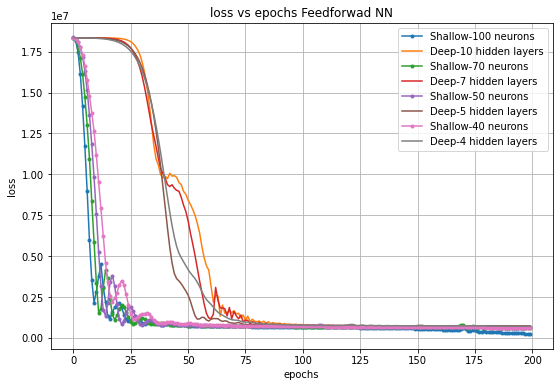

In [ ]:
plt.figure(figsize=[9,6])
plt.plot(range(len(loss_f1_F_S_4_ReLu)), loss_f1_F_S_4_ReLu, label='Shallow-100 neurons', marker='.')
plt.plot(range(len(loss_f1_F_D_4_ReLu)), loss_f1_F_D_4_ReLu, label='Deep-10 hidden layers')
plt.plot(range(len(loss_f1_F_S_3_ReLu)), loss_f1_F_S_3_ReLu, label='Shallow-70 neurons', marker='.')
plt.plot(range(len(loss_f1_F_D_3_ReLu)), loss_f1_F_D_3_ReLu, label='Deep-7 hidden layers')
plt.plot(range(len(loss_f1_F_S_2_ReLu)), loss_f1_F_S_2_ReLu, label='Shallow-50 neurons', marker='.')
plt.plot(range(len(loss_f1_F_D_2_ReLu)), loss_f1_F_D_2_ReLu, label='Deep-5 hidden layers')
plt.plot(range(len(loss_f1_F_S_1_ReLu)), loss_f1_F_S_1_ReLu, label='Shallow-40 neurons', marker='.')
plt.plot(range(len(loss_f1_F_D_1_ReLu)), loss_f1_F_D_1_ReLu, label='Deep-4 hidden layers')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs Feedforwad NN')
plt.legend()
plt.grid()
plt.savefig('./figures/loss_vs_epochs_f1_1_D_VS_S')
plt.show()

The winner is shallow NNs ...

### Quantizing the Feedforward NN

Testing several activation functions and their impact on overflow

## Bonus